In [2]:
import pandas as pd

benin = pd.read_csv("data/benin_clean.csv")
sierra_leone = pd.read_csv("data/data/sierraleone-bumbuna.csv")
togo = pd.read_csv("data/data/togo-dapaong_qc.csv")

benin["Country"] = "Benin"
sierra_leone["Country"] = "Sierra Leone"
togo["Country"] = "Togo"

df_all = pd.concat([benin, sierra_leone, togo], ignore_index=True)


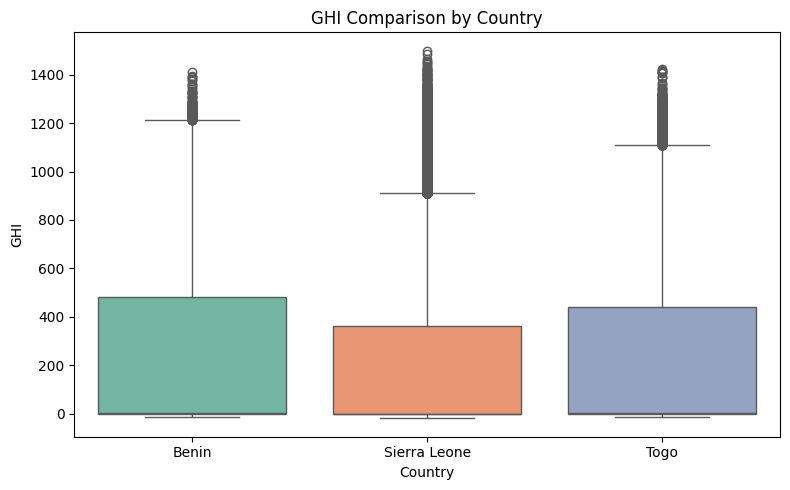

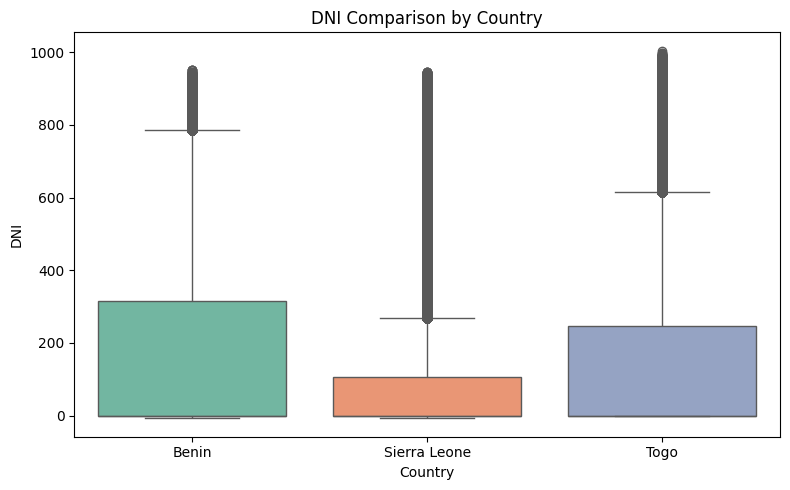

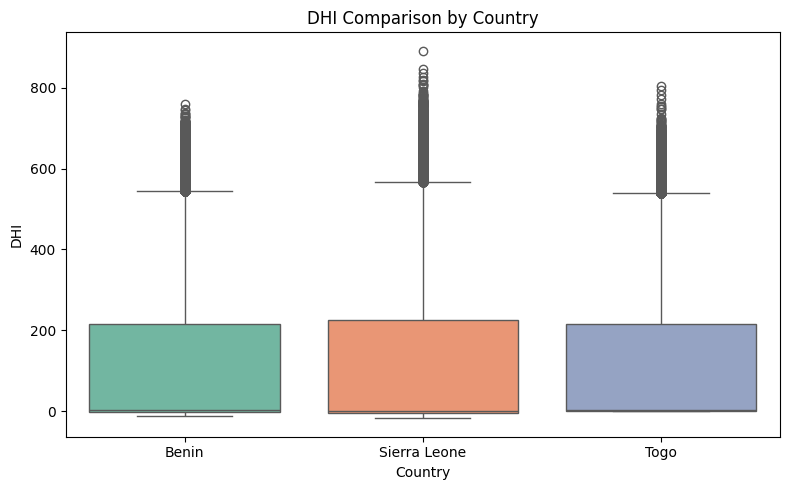

In [4]:
for metric in ["GHI", "DNI", "DHI"]:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_all, x="Country", y=metric, hue="Country", palette="Set2", legend=False)
    plt.title(f"{metric} Comparison by Country")
    plt.ylabel(metric)
    plt.xlabel("Country")
    plt.tight_layout()
    plt.show()



In [5]:
summary = df_all.groupby("Country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"]).round(2)
summary


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         158.69  
Sierra Leone  158.95  
Togo          156.52

In [6]:
from scipy.stats import f_oneway

f_stat, p_val = f_oneway(
    benin["GHI"].dropna(),
    sierra_leone["GHI"].dropna(),
    togo["GHI"].dropna()
)

print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")


ANOVA F-statistic: 2090.09, p-value: 0.0000


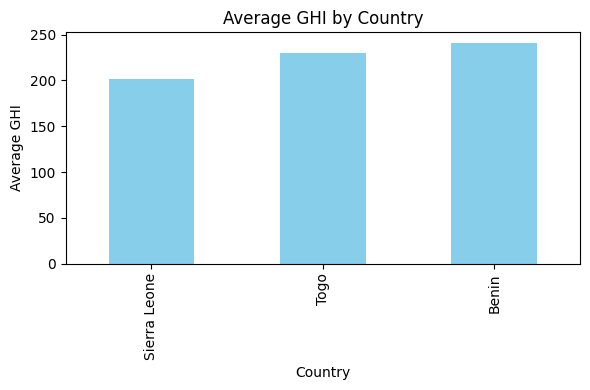

In [7]:
avg_ghi = df_all.groupby("Country")["GHI"].mean().sort_values()

plt.figure(figsize=(6, 4))
avg_ghi.plot(kind='bar', color='skyblue')
plt.title("Average GHI by Country")
plt.ylabel("Average GHI")
plt.xlabel("Country")
plt.tight_layout()
plt.show()
